In [407]:
import torch
from matplotlib import pyplot as plt
from torch import Tensor

torch.set_printoptions(threshold=10, linewidth=128)  # for printing

In [408]:
MAX = 100
x = torch.linspace(0, 10, steps=MAX, dtype=float)
print(x.shape, x)

torch.Size([100]) tensor([ 0.0000,  0.1010,  0.2020,  ...,  9.7980,  9.8990, 10.0000], dtype=torch.float64)


In [409]:
y = 10 * x + torch.randint(-10, 10, (MAX,))
print(y.shape, y)

torch.Size([100]) tensor([ 8.0000e+00,  1.0101e-02, -7.9798e+00,  ...,  9.8980e+01,  9.4990e+01,  1.0300e+02], dtype=torch.float64)


In [410]:
#plt.scatter(x, y)

In [411]:
w = torch.randint(0, 10, (1,), dtype=float, requires_grad=True)
print(w.shape, w)

b = torch.randint(0, 10, (1,), dtype=float, requires_grad=True)
print(b.shape, b)

torch.Size([1]) tensor([0.], dtype=torch.float64, requires_grad=True)
torch.Size([1]) tensor([6.], dtype=torch.float64, requires_grad=True)


$ y = wx + b $

In [412]:
def hypothesis(x) -> Tensor:
    return w * x + b

$
\begin{align}
loss &= y_i - \hat{y_i} \\
cost &= \frac 1 n \sum_{i}^{n} loss^2 \\
     &= \frac 1 n \sum_{i}^{n} (y_i - \hat{y_i})^2 \\
     &= \frac 1 n \sum_{i}^{n} (y_i - (wx_i + b))^2
\end{align}
$

In [413]:
def cost_fn(y: Tensor, x: Tensor) -> Tensor:
    return torch.sum((y - hypothesis(x)) ** 2) / len(y)

In [414]:
def dcost_dw(y: Tensor, x: Tensor):
    pass  # Use PyTorch autograd

In [415]:
def dcost_db(y: Tensor, x: Tensor):
    pass  # Use PyTorch autograd

   0 : cost = 2808.5507744107745
  10 : cost = 717.6707712956486
  20 : cost = 211.81842384396532
  30 : cost = 89.3468969121795
  40 : cost = 59.60703393680362
  50 : cost = 52.29786110750049
  60 : cost = 50.41527118418633
  70 : cost = 49.84637286289097
  80 : cost = 49.59634656705593
  90 : cost = 49.424558548934655
 100 : cost = 49.27279438023311


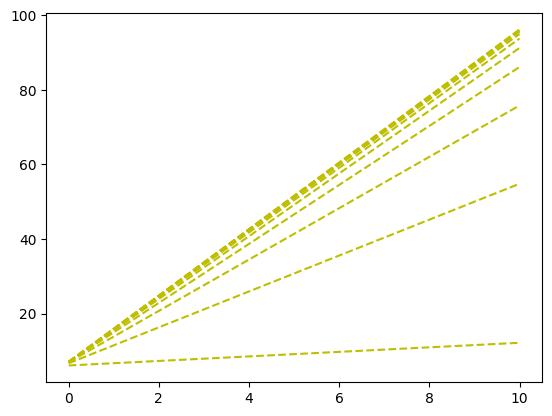

In [416]:
lr = 0.001
for e in range(101):
    cost = cost_fn(y, x)
    cost.backward()
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad = None  # grad 초기화
        b.grad = None  # grad 초기화
    # plt.subplot(211)
    if not e % 10:
        print(f"{e:4} : cost = {cost}")
        plt.plot(x.tolist(), hypothesis(x).tolist(), '--y', label=f"epoch {e}")

In [417]:
# plt.subplot(211)
# plt.plot(x, y, 'oc')
# plt.plot(x, hypothesis(x), 'r')
# plt.xlabel('x axis')
# plt.ylabel('y axis')

In [418]:
# plt.subplot(212)
# plt.plot(costs)
# plt.xlabel('epoch')
# plt.ylabel('cost')